In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

Read the Credit Card Dataset

In [5]:
data = pd.read_csv("creditcard.csv")

Preprocessing the data

In [6]:
print(data.isnull().sum())
data.isnull().fillna(0, inplace=True)
print(data.info)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803 

Creating Train & Test Data

In [7]:
X = data.iloc[:, 0:30]
y = data.Class
Fraud = data[data['Class'] == 1]
print(Fraud.Amount.describe())
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
Fraud Cases: 492
Valid Transactions: 284315


Heatmap for Data

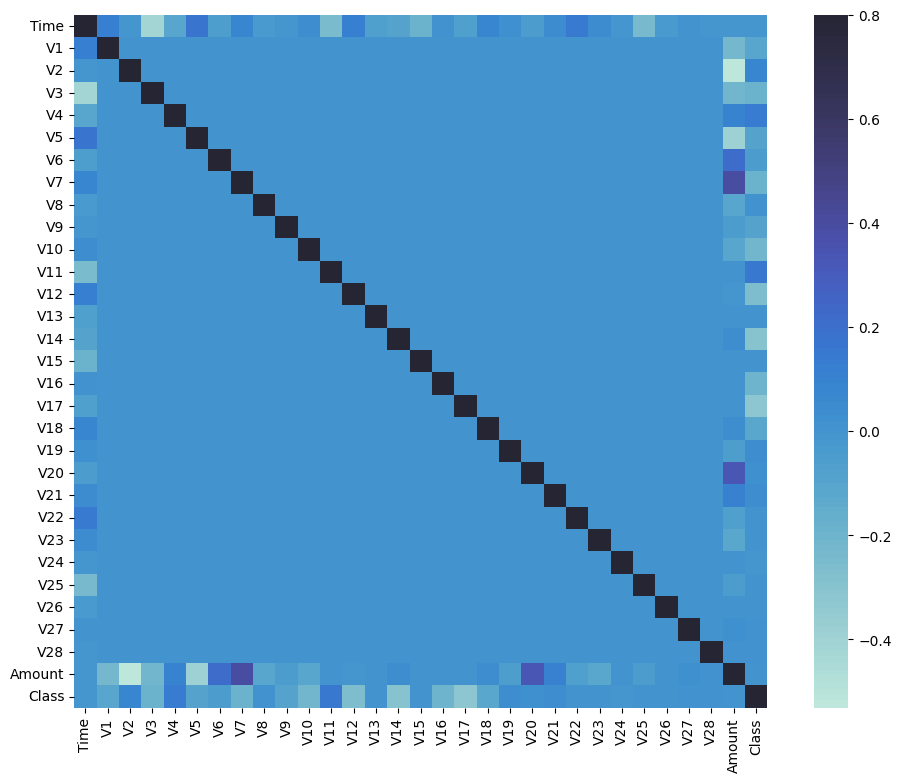

In [8]:
corr = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corr, vmax = .8, square = True,center=1)
plt.show()

Splitting the Dataset

In [9]:
X_train, Xtest, y_train, ytest = train_test_split(X, y, test_size=0.25)

Training the model using SVM

In [10]:
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

Evaluating the model

In [11]:
y_pred = classifier.predict(Xtest)
print("Accuracy score for this model is :", accuracy_score(ytest, y_pred))
print("Precision score for this model is :", precision_score(ytest, y_pred,zero_division=True))
print("Recall score for this model is :", recall_score(ytest, y_pred,zero_division=True))
print("F1 score for this model is :", f1_score(ytest, y_pred,zero_division=True))

Accuracy score for this model is : 0.9983427431813713
Precision score for this model is : 1.0
Recall score for this model is : 0.0
F1 score for this model is : 0.0


Testing on new data

In [12]:
new_data = pd.read_csv("Newdata.csv")
test = classifier.predict(new_data)
print(test)

[0 0]
